In [11]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Parameters
L = 100      # Length of the domain
c_ice = 0.5  # Speed of the wave through sea ice (arbitrary unit, slower than in water)
nx = 200     # Number of spatial points
nt = 200     # Number of time points
dx = L / (nx - 1)
dt = 0.1     # Time step

# Initial conditions
x = np.linspace(0, L, nx)
u = np.sin(2 * np.pi * x / L) * np.exp(-0.02 * x)  # Initial wave shape
ut = np.zeros(nx)  # Initial velocity is zero

# Create a 2D array to store the solution at each time step
u_sol = np.zeros((nt, nx))
u_sol[0, :] = u

# Time evolution
for n in range(1, nt):
    c_ice = n/nt
    u_sol[n, 1:-1] = (2 * (1 - c_ice**2 * dt**2 / dx**2) * u_sol[n-1, 1:-1] -
                      u_sol[n-2, 1:-1] +
                      c_ice**2 * dt**2 / dx**2 * (u_sol[n-1, 2:] + u_sol[n-1, :-2]))

# Create the animation
fig, ax = plt.subplots(figsize=(12, 8))
ax.set_xlim(0, L)
ax.set_ylim(-100, 100)
line, = ax.plot([], [], lw=2)

def init():
    line.set_data([], [])
    return line,

def animate(i):
    line.set_data(x, u_sol[i, :])
    return line,

ani = FuncAnimation(fig, animate, init_func=init, frames=nt, interval=50, blit=True)

ani.save('/Users/noahday/GitHub/random-code/wave_propagation_sea_ice.mp4', writer='ffmpeg', fps=30)
plt.close(fig)

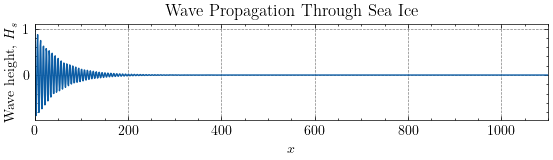

In [46]:
alpha = 2*10**-2
x = np.linspace(0,1100,1200)
wave = np.cos(x)*np.exp(-alpha*x)


import scienceplots
plt.style.use('default')
import matplotlib.colors as mcolors
plt.style.use(['science', 'grid'])
#plt.style.use(['science','ieee'])
textwidth = 3.31314*2
aspect_ratio = 6/8
scale = 1.0
width = textwidth * scale
height = width * aspect_ratio/2

fig, ax = plt.subplots(figsize=(width, height/2))
ax.set_xlim(0, 1100)
#ax.set_ylim(-100, 100)

ax.plot(x, wave)
ax.set_xlabel('$x$')
ax.set_ylabel('Wave height, $H_s$')
ax.set_title('Wave Propagation Through Sea Ice')
#plt.legend()
ax.grid(True)

savepath = '/Users/noahday/Desktop/'
plt.savefig(savepath+'wave_prop.png', dpi = 900) 

plt.show()